## Рисковый курс по обучению с подкреплением. 
### Занятие 7. Модельные методы. Линейные среды. LQR


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display,clear_output
%matplotlib inline

### Среда Роборука

Роборука имеет 2 шарнира, положение которых задано углами s[0] и s[1]. Скорость изменения углов задана s[2] и s[3], где s - вектор состояния.

Контроллер u[0] и u[1] линейно воздействует на скорость.

В начале эпизода положение целевого положения манипулятора (серый) выбирается случайно

Задача заключается в том, чтобы синий (управляемый) и серый (целевой) манипуляторы находились в одном положении.



In [39]:
class RoboHand():
    
    import numpy as np
    import matplotlib.pyplot as plt
        
#     class ActionSpace():        
        
#         def __init__(self):
#             self.n = 2 # accelerate two angles
                
#         def sample(self):
#             return np.random.choice(range(self.n))
        
#         def contains(self,a):
#             assert (type(a) == type(0)), 'Illegal action. Must be int.'
#             return a < self.n
        
#     class ObservationSpace():
        
#         def __init__(self,feat_cols,actions_num):
#             self.shape = 2*2 # two angles and it's velocity
            
#         def sample(self,data):
#             pass                  #TODO
        
#         def contains(self,a):
#             pass                  #TODO

    def __init__(self, T = 100, gamma = 10, delta =10):
        self.T = T
        self.gamma = gamma  # velocity penalty 
        self.delta = delta  # acceleration penalty
        
    def reset(self, init_state_goal = None):
        
        if init_state_goal: self.state,self.goal = init_state
        else: 
            self.goal = np.random.rand(2)*np.pi # angle coordinates of goal position
            self.state = np.concatenate((self.goal + np.random.rand(2)*np.pi,np.zeros(2)))
        self.done = False
        self.t = 0
        self.show = False
        return self.state
    
    def move_goal(self):
        # TODO implement moving goal 
        return self.goal
    
    def get_env_dynamic(self):
        F = np.concatenate([np.eye(4),np.zeros([4,2])],axis=1) + \
            np.concatenate([np.zeros([4,2]),np.eye(4)],axis=1)
        f = np.zeros(4)
        
        C = np.array(
            [[1,0,0,0,0,0],
             [0,1,0,0,0,0],
             [0,0,self.gamma,0,0,0],
             [0,0,0,self.gamma,0,0],
             [0,0,0,0,self.delta,0],
             [0,0,0,0,0,self.delta]])
        c = np.array([-self.goal[0],-self.goal[1],0,0,0,0])
        
        return F,f,C,c
    
    def step(self,a):
        if not self.done:
            self.goal = self.move_goal() 
            F,f,C,c = self.get_env_dynamic()
            xu  = np.concatenate([self.state,a])
            self.state, reward = F.dot(xu) + f, -xu.T.dot(C).dot(xu) - c.dot(xu)
            self.done = self.t >= self.T
        else: reward = 0
        self.t += 1
        if self.show: self.render;
        return self.state, reward, self.done, ''
    
    def render(self):
        plt.clf();
        fig, ax = plt.subplots();
        ax.plot([0,np.sin(self.goal[0]),np.sin(self.goal[0])+np.sin(self.goal[:2].sum())],
                 [0,np.cos(self.goal[0]),np.cos(self.goal[0])+np.cos(self.goal[:2].sum())],
                'o-', color='999999', linewidth=7,markersize=12)
        ax.plot([0,np.sin(self.state[0]),np.sin(self.state[0])+np.sin(self.state[:2].sum())],
                 [0,np.cos(self.state[0]),np.cos(self.state[0])+np.cos(self.state[:2].sum())],
                 'bo-', linewidth=5,markersize=10)
#         ax.scatter(*env.goal,s=120,c='r')
        ax.set_xlim([-2.2,2.2]);
        ax.set_ylim([-2.2,2.2]);
        ax.axis('off');        
        return fig
    
    def sample_action(self):
        return np.random.randn(2)*0.05

#### Пример, как работает среда

/home/kposminin/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


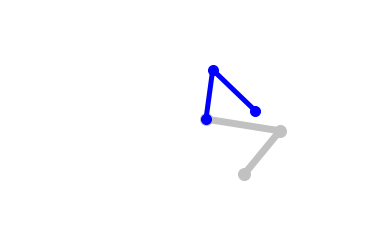

'Step 19. Reward -27.99121079446958'

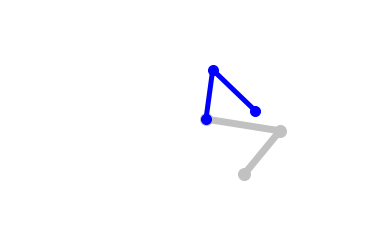

In [40]:
import time
env = RoboHand(T=20)
env.reset()

for t in range(env.T):
    a = env.sample_action()
    s,r,d,_ = env.step(a)
    clear_output(wait=True)
    display(env.render())
    display(f'Step {t}. Reward {r}')
    time.sleep(0.15)

In [41]:
def lqr(x0,T,F,f,C,c):
    '''
    Plan best actions for T timesteps for linear environment
    x0 (array) is initail position.
    T (int) is time steps to plan number
    F (numpy 2d array) env dynamic
    f (numpy 1d array) env dynamic
    C (numpy 2d array) env reward
    f (numpy 1d array) env reward
    
    Returns list (length T) of best actions (each is 1d numpy array).
    '''
    
    assert ((F.shape[0] == f.shape[0]) & (F.shape[1] == c.shape[0]) & 
            (C.shape[0] == c.shape[0]) & (C.shape[1] == c.shape[0]) & 
            (x0.shape[0] == f.shape[0])), 'F,f,C,c shape mismatch'
    assert (x0.shape[0] < c.shape[0]), 'action dim mismatch'
    
    sd = x0.shape[0] #state_space dimesion
    ad = c.shape[0] - f.shape[0] # action state_space dimesion
    
    a = np.zeros((T, ad))
    
    YOUR CODE HERE
    
    return a

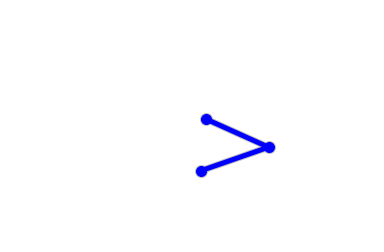

'Step 99. Reward -0.00. Action [0. 0.]'

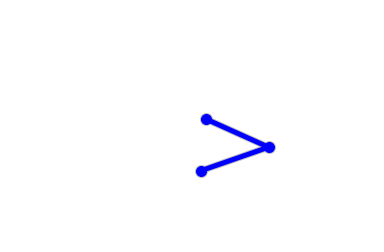

In [46]:
env = RoboHand(T=100, gamma= 100,delta=100)
s = env.reset()
a = lqr(s,env.T, *env.get_env_dynamic())

for t in range(env.T):
    s,r,d,_ = env.step(a[t])
    clear_output(wait=True)
    display(env.render())
    display(f'Step {t}. Reward {r:.2f}. Action {a[t]}')
    time.sleep(0.10)        

### Домашнее задание
1. Реализовать LQR (2 балла).
2. Допилить среду, чтобы нормально рисовалось ( +2 балла).
3. Позапускать с разными наборами T, GAMMA, DELTA = [[20,0,0],[20,100,0],[20,0,100],[100,100,100]].
4. Реализовать движущуюся цель. Переписать LQR, для меняющейся динамики (+3 балла).
5. Реализовать ту же среду для 3х-мерного случая (+5 баллов). 
6. Реализовать тележку как линейную среду. Кост - отклонение позиции от нулевой, а угла штанги от вертикали. (+3 балла).
